Tasks 2: Exploratory Data Analysis (EDA)

In [1]:
#loading data 
import pandas as pd
df=pd.read_csv("updated_dataset_after_task_1.csv")

In [2]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,True,False,False,True,True,...,False,False,False,True,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.5,False,True,True,False,True,...,True,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,0,2,53.85,108.15,False,True,True,False,True,...,False,False,False,True,False,False,False,True,False,True
3,7795-CFOCW,0,45,42.30,1840.75,False,True,True,False,True,...,True,False,True,False,True,False,False,False,True,False
4,9237-HQITU,0,2,70.70,151.65,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True


In [3]:
df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contrac

In [4]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

In [5]:
# Identify categorical columns with boolean values
categorical_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean values to 1 and 0 for all categorical columns
for col in categorical_columns:
    df[col] = df[col].astype(int)

In [6]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                                int32
gender_Male                                  int32
Partner_No                                   int32
Partner_Yes                                  int32
Dependents_No                                int32
Dependents_Yes                               int32
PhoneService_No                              int32
PhoneService_Yes                             int32
MultipleLines_No                             int32
MultipleLines_No phone service               int32
MultipleLines_Yes                            int32
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No                           int32
OnlineSecurity_No              

In [7]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


Calculate and visualize the overall churn rate.

In [8]:
#total number of customers
total_customers = df.shape[0]

#number of churned customers
num_churned = df['Churn_Yes'].sum()
print(total_customers)
print(num_churned)


7043
1869


In [9]:
#churn rate
churn_rate = num_churned / total_customers
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 26.54%


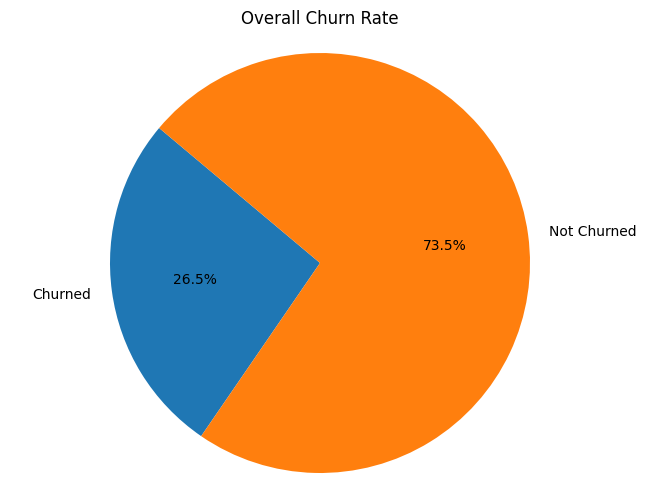

In [10]:
import matplotlib.pyplot as plt

# Data for visualization
churn_counts = [num_churned, total_customers - num_churned]
labels = ['Churned', 'Not Churned']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Overall Churn Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Explore customer distribution by various demographics

In [11]:
gender_counts = df[['gender_Female', 'gender_Male']].sum()
gender_counts

gender_Female    3488
gender_Male      3555
dtype: int64

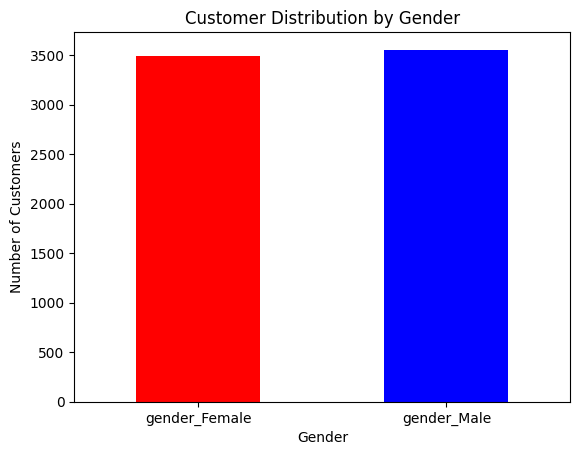

In [12]:
gender_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

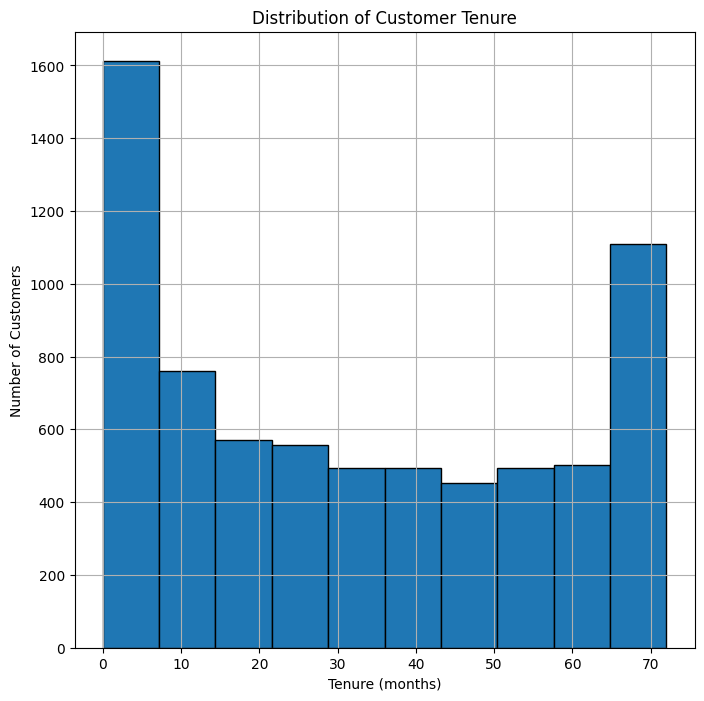

In [13]:
# Plotting the histogram
plt.figure(figsize=(8, 8))
plt.hist(df['tenure'], bins=10, edgecolor='black')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [14]:
df2=pd.read_csv("Telco_Customer_Churn_Dataset .csv")

c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


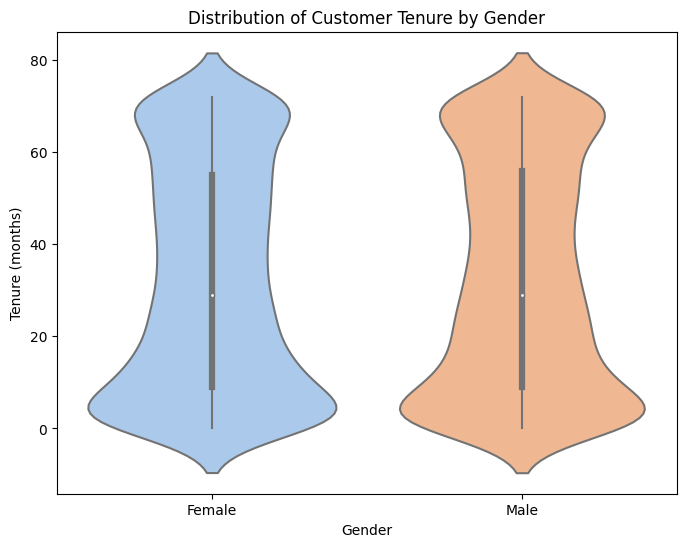

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='tenure', data=df2, palette='pastel')
plt.title('Distribution of Customer Tenure by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (months)')
plt.show()

c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


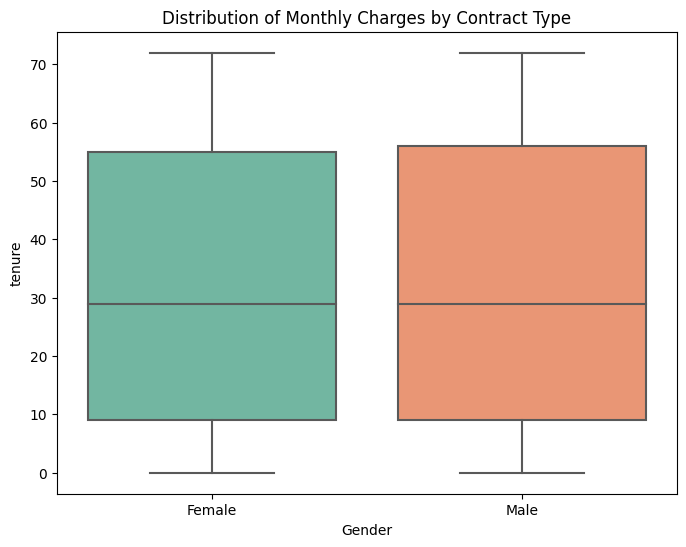

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='tenure', data=df2, palette='Set2')
plt.title('Distribution of Monthly Charges by Contract Type')
plt.xlabel('Gender')
plt.ylabel('tenure')
plt.show()

In [17]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df2['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [19]:
df2['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


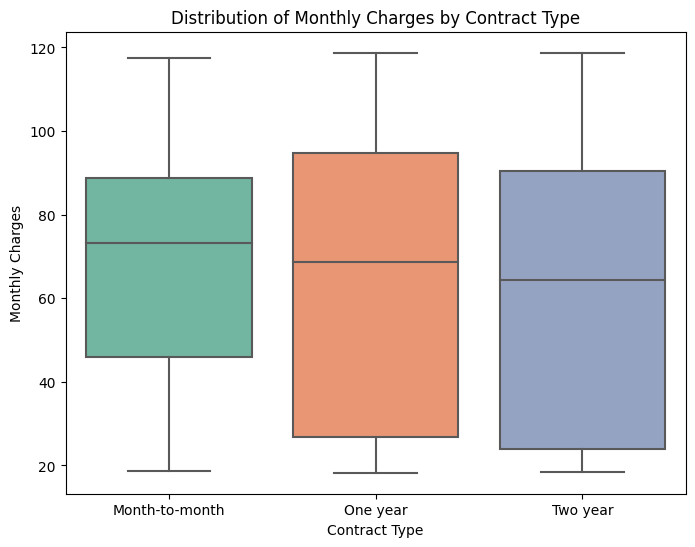

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df2, palette='Set2')
plt.title('Distribution of Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

Analyze tenure distribution.

In [21]:
# Descriptive statistics for the 'tenure' column
print(df['tenure'].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


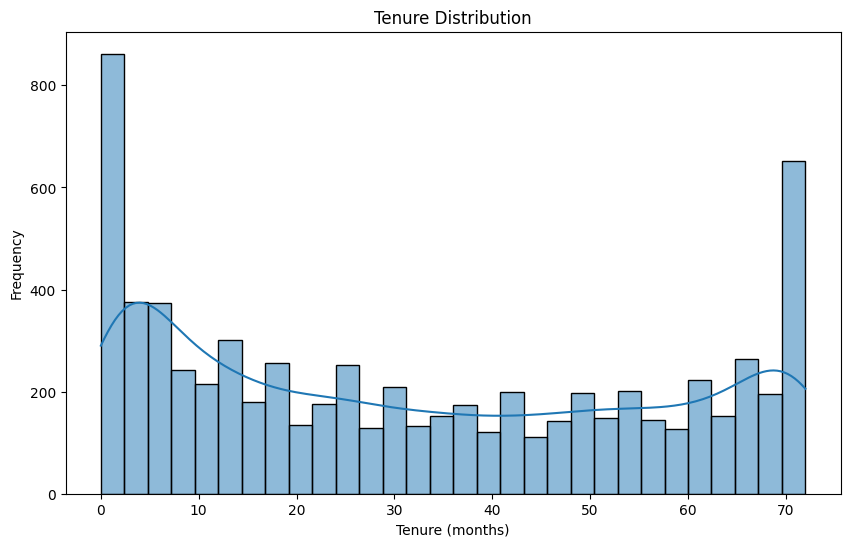

In [22]:
# Plotting the distribution of 'tenure'
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


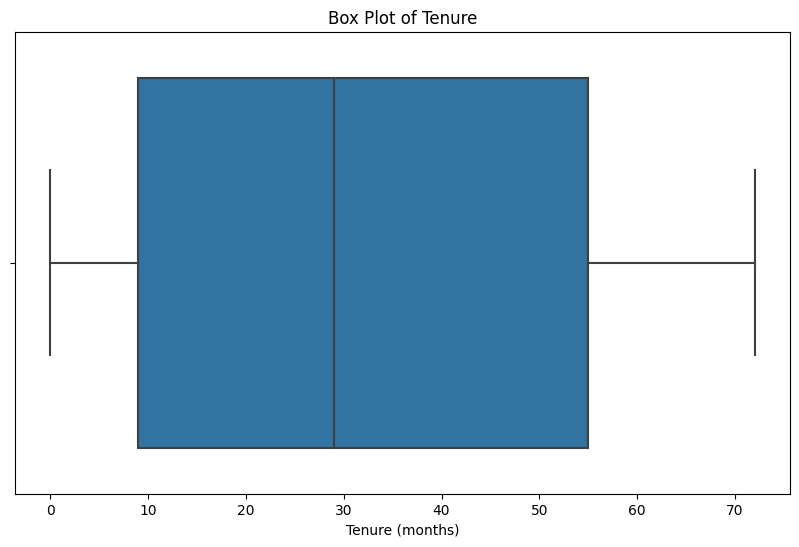

In [23]:
# Box plot to visualize the spread of 'tenure'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure (months)')
plt.show()


In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)
# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
# Identify outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers)


9.0 55.0
-60.0 124.0
Number of outliers: 0
Empty DataFrame
Columns: [customerID, SeniorCitizen, tenure, MonthlyCharges, TotalCharges, gender_Female, gender_Male, Partner_No, Partner_Yes, Dependents_No, Dependents_Yes, PhoneService_No, PhoneService_Yes, MultipleLines_No, MultipleLines_No phone service, MultipleLines_Yes, InternetService_DSL, InternetService_Fiber optic, InternetService_No, OnlineSecurity_No, OnlineSecurity_No internet service, OnlineSecurity_Yes, OnlineBackup_No, OnlineBackup_No internet service, OnlineBackup_Yes, DeviceProtection_No, DeviceProtection_No internet service, DeviceProtection_Yes, TechSupport_No, TechSupport_No internet service, TechSupport_Yes, StreamingTV_No, StreamingTV_No internet service, StreamingTV_Yes, StreamingMovies_No, StreamingMovies_No internet service, StreamingMovies_Yes, Contract_Month-to-month, Contract_One year, Contract_Two year, PaperlessBilling_No, PaperlessBilling_Yes, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card 

c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

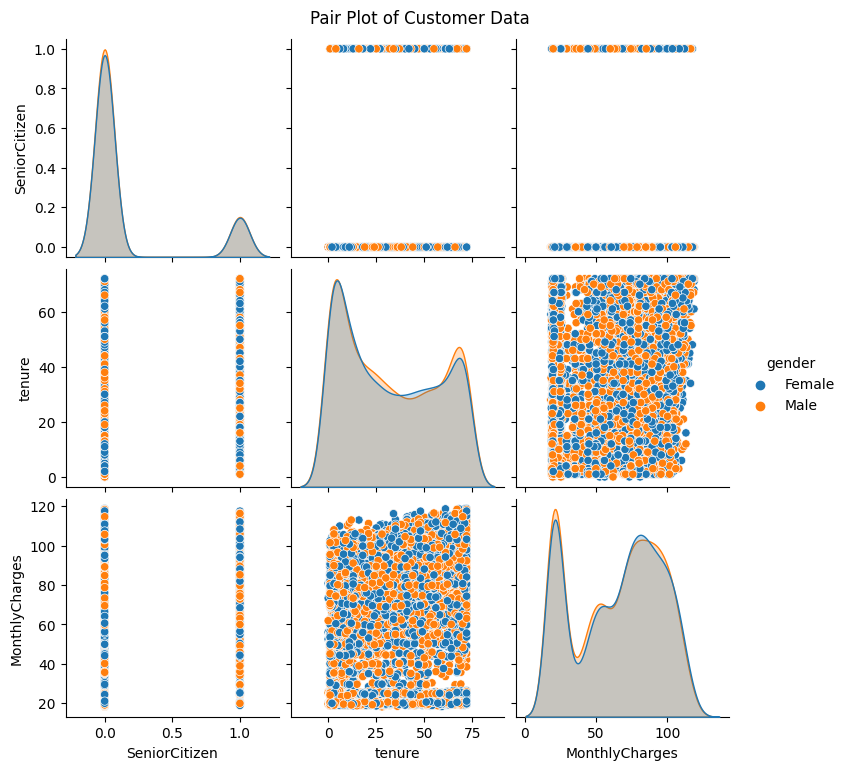

In [25]:
import seaborn as sns
import pandas as pd
sns.pairplot(df2, diag_kind='kde',hue='gender')
plt.suptitle('Pair Plot of Customer Data', y=1.02)
plt.show()



Investigate relationships between churn and different contract types/payment methods.

c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

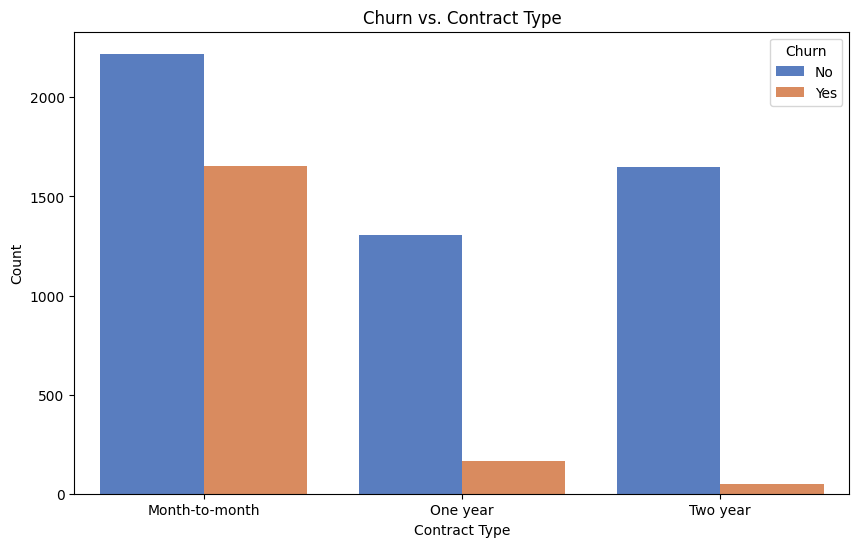

In [26]:
# Stacked bar plot of Churn vs. Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df2, palette='muted')
plt.title('Churn vs. Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

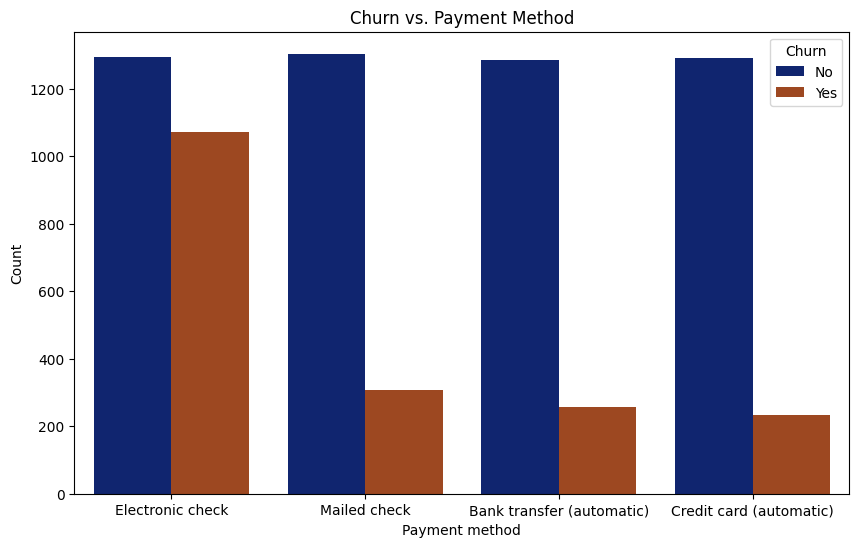

In [27]:
# Stacked bar plot of Churn vs. Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df2, palette='dark')
plt.title('Churn vs. Payment Method')
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

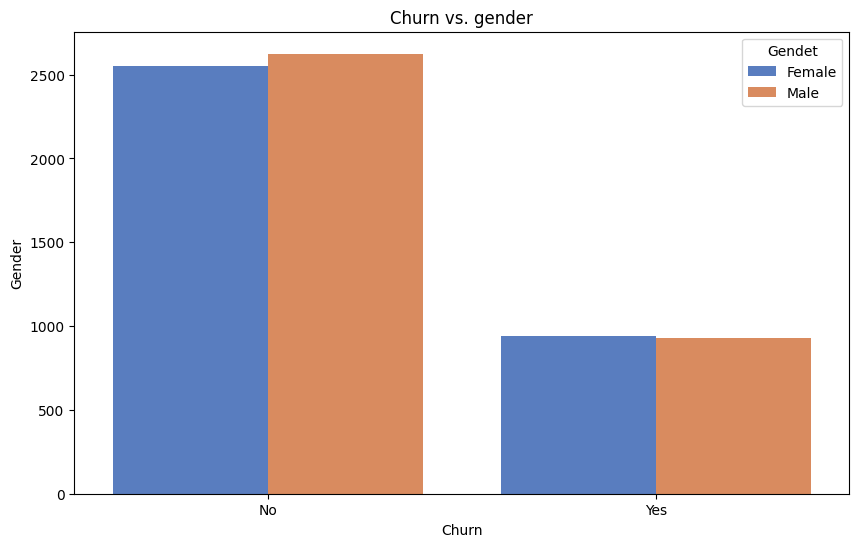

In [28]:
# Stacked bar plot of Churn vs. Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='gender', data=df2, palette='muted')
plt.title('Churn vs. gender')
plt.xlabel('Churn')
plt.ylabel('Gender')
plt.legend(title='Gendet', loc='upper right')
plt.show()
